In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("BMW sales data (2010-2024) (1).csv")
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.dtypes

In [ ]:
df["Car_Age"] = 2024 - df["Year"]
df

In [ ]:
def price_outlier(df):
    Q1 = df['Price_USD'].quantile(0.25)
    Q3 = df['Price_USD'].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df['Price_USD'] < lower) | (df['Price_USD'] > upper)]
    return outliers


In [ ]:
price_outlier(df)


In [ ]:
def Sales_outlier(df):
    Q1=df['Sales_Volume'].quantile(0.25)
    Q3=df['Sales_Volume'].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    outlier=df[(df['Sales_Volume']<lower) | (df['Sales_Volume']> upper) ]
    return outlier

In [ ]:
Sales_outlier(df)

In [ ]:
def Engine_Size_outlier(df):
    Q1 = df['Engine_Size_L'].quantile(0.25)
    Q3 = df['Engine_Size_L'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier = df[(df['Engine_Size_L'] < lower) | (df['Engine_Size_L'] > upper)]

    return outlier


Engine_Size_outlier(df)
    

In [ ]:
def Mileage_KM_outlier(df):
    Q1 = df['Mileage_KM'].quantile(0.25)
    Q3 = df['Mileage_KM'].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier = df[(df['Mileage_KM'] < lower) | (df['Mileage_KM'] > upper)]
    return outlier

Mileage_KM_outlier(df)


In [ ]:
model_per_sales=df.groupby("Model")["Sales_Volume"].size().sort_values()
model_per_sales=model_per_sales.sort_values(ascending=True)
model_per_sales

In [ ]:
ax = model_per_sales.plot(
    kind='bar',rot=30,
    xlabel='Model',ylabel='Sales'
)

for i, v in enumerate(model_per_sales):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


In [ ]:
model_per_sales.plot(kind='pie',legend=True,autopct='%1.2f%%',figsize=(12,9))

In [ ]:
sales_per_region=df.groupby('Region')['Sales_Volume'].sum()
sales_per_region=sales_per_region.sort_values(ascending=True)
sales_per_region

In [ ]:
sales_per_region.plot(kind='pie',autopct='%1.3f%%',legend=True,figsize=(12,9))

In [ ]:
df

In [ ]:
manual_transmission=df[df.Transmission=='Manual']
manual_transmission

In [ ]:
automatic_transmission=df[df.Transmission=='Automatic']
automatic_transmission

In [ ]:
unique_region=df['Region'].unique()
unique_region

In [ ]:
color_filter=df.groupby('Color').size()
color_filter=color_filter.sort_values(ascending=True)
color_filter

In [ ]:
ax = color_filter.plot(
    kind='bar',
    rot=35,
    xlabel='Color',
    ylabel='Count',
    title='Count of Color',
    color='skyblue'
)

for i, v in enumerate(color_filter):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)


In [ ]:
fuel_type=df.groupby("Fuel_Type").size()
fuel_type=fuel_type.sort_values(ascending=True)
fuel_type

In [ ]:
sales_classification=df.groupby('Sales_Classification').size()
sales_classification=sales_classification.sort_values(ascending=True)
sales_classification

In [ ]:
transmission=df.groupby('Transmission').size()
transmission=transmission.sort_values(ascending=True)
transmission

In [ ]:
regin=df.groupby('Region').size()
regin=regin.sort_values(ascending=True)
regin

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
fuel_type.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12),startangle=20)
plt.subplot(2,2,2)
sales_classification.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12))
plt.subplot(2,2,3)
transmission.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12),startangle=35)
plt.subplot(2,2,4)
regin.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12))

In [ ]:
cols=['Year','Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']

for col in cols:
    plt.figure()
    sns.histplot(automatic_transmission[col],kde=True),
    plt.show()

In [ ]:
cols=['Year','Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']

for col in cols:
    plt.figure()
    sns.histplot(manual_transmission[col],kde=True),
    plt.show()

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.boxplot(data=df,x='Model', y='Price_USD')
plt.xticks(rotation=45)

In [ ]:
sns.boxplot(data=df,y='Sales_Classification',x='Region')
plt.xticks(rotation=45)

In [ ]:
numeric_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Year']  
sns.pairplot(automatic_transmission[numeric_cols])
plt.show()


In [ ]:
numeric_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Year']  
sns.pairplot(m[numeric_cols])
plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Electric')])

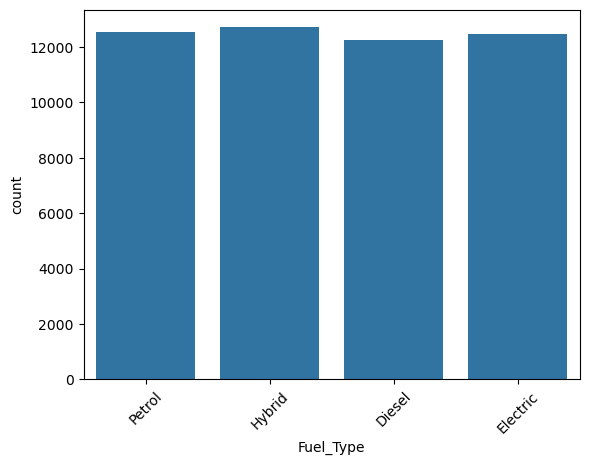

In [43]:
sns.countplot(data=df,x='Fuel_Type')
plt.xticks(rotation=45)